In [32]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

traindata = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
testdata = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')
train_data = traindata[:,:-1]
train_labels = traindata[:,-1]
test_data = testdata[:,:-1]
test_labels = testdata[:,-1]

diatoms = np.loadtxt('diatoms.txt')
pca_toydata = np.loadtxt('pca_toydata.txt')

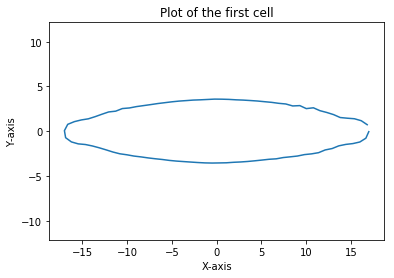

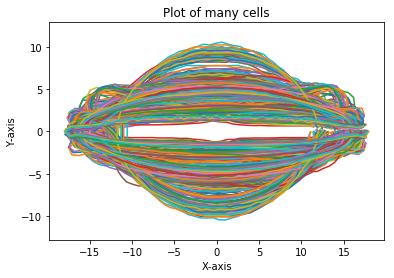

In [33]:
#Exercise 1

#Plotting first cell
first_cell = diatoms[0]
x = first_cell[0::2]
y = first_cell[1::2]
plt.plot(x,y)
plt.title('Plot of the first cell')
plt.axis('equal')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.show()

#Plotting all cells
cells = diatoms
x_cords = [cells[i,0::2] for i in range(len(diatoms))]
y_cords = [cells[i,1::2] for i in range(len(diatoms))]
for i in range(len(diatoms)):
    plt.plot(x_cords[i], y_cords[i])
plt.title('Plot of many cells')
plt.axis('equal')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.show()

In [34]:
#Exercise 2
def pca(data):
    #Linear Algebra
    cov_matrix = np.cov(np.transpose(data))
    eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
    
    #Sorting eigenvectors by their largest eigenvalues
    sorter = np.argsort(eigenvals)
    sorter = np.flipud(sorter)
    sorted_eigenvals = np.real(eigenvals[sorter][:])
    sorted_eigenvecs = np.real(eigenvecs[:,sorter])

    return sorted_eigenvals, sorted_eigenvecs

eigenvals, eigenvecs = pca(diatoms)

#Mean-cell
mean_cell = []
for i in range(len(diatoms[0])):
    mean_cell.append(np.mean(diatoms[:,i]))
#First three PC's
e1 = eigenvecs[0]
e2 = eigenvecs[1]
e3 = eigenvecs[2]
#Standard deviations
s1 = np.sqrt(eigenvals[0])
s2 = np.sqrt(eigenvals[1])
s3 = np.sqrt(eigenvals[2])

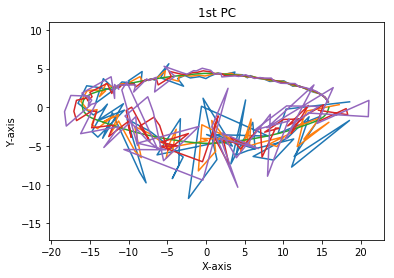

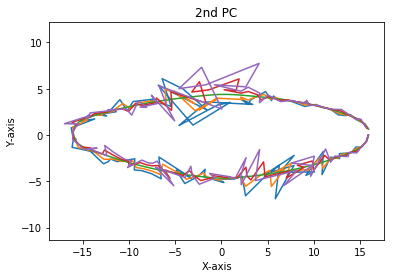

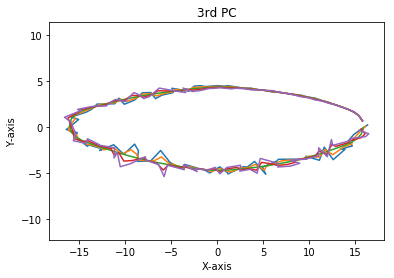

In [35]:
#1st PC
plt.plot((mean_cell - 2*s1*e1)[0::2], (mean_cell - 2*s1*e1)[1::2])
plt.plot((mean_cell - s1*e1)[0::2], (mean_cell - s1*e1)[1::2])
plt.plot(mean_cell[0::2], mean_cell[1::2])
plt.plot((mean_cell + s1*e1)[0::2], (mean_cell + s1*e1)[1::2])
plt.plot((mean_cell + 2*s1*e1)[0::2], (mean_cell + 2*s1*e1)[1::2])
plt.title('1st PC')
plt.axis('equal')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.show()

#2nd PC
plt.plot((mean_cell - 2*s2*e2)[0::2], (mean_cell - 2*s2*e2)[1::2])
plt.plot((mean_cell - s2*e2)[0::2], (mean_cell - s2*e2)[1::2])
plt.plot(mean_cell[0::2], mean_cell[1::2])
plt.plot((mean_cell + s2*e2)[0::2], (mean_cell + s2*e2)[1::2])
plt.plot((mean_cell + 2*s2*e2)[0::2], (mean_cell + 2*s2*e2)[1::2])
plt.title('2nd PC')
plt.axis('equal')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.show()

#3rd PC
plt.plot((mean_cell - 2*s3*e3)[0::2], (mean_cell - 2*s3*e3)[1::2])
plt.plot((mean_cell - s3*e3)[0::2], (mean_cell - s3*e3)[1::2])
plt.plot(mean_cell[0::2], mean_cell[1::2])
plt.plot((mean_cell + s3*e3)[0::2], (mean_cell + s3*e3)[1::2])
plt.plot((mean_cell + 2*s3*e3)[0::2], (mean_cell + 2*s3*e3)[1::2])
plt.title('3rd PC')
plt.axis('equal')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.show()

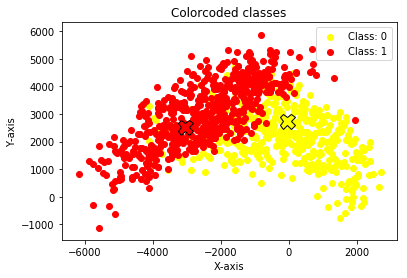

In [36]:
#Exercise 4
eigenvals, eigenvecs = pca(train_data)
two_PC = eigenvecs[:,:2]
two_PC = np.dot(train_data, two_PC).T

from sklearn.cluster import KMeans

#Computing initial centroids
centroids = train_data[0:2,:]

#Calculating clusters
clusters = KMeans(2, centroids, n_init=1)
clusters.fit(train_data)
finalclusters = clusters.cluster_centers_
two_PC_clusters = np.dot(finalclusters, eigenvecs[:,0:2])

plt.scatter(two_PC[0][train_labels==0], two_PC[1][train_labels==0], c="yellow", label="Class: " + str(0))
plt.scatter(two_PC[0][train_labels==1], two_PC[1][train_labels==1], c="red", label="Class: " + str(1))
plt.plot(two_PC_clusters[0,0], two_PC_clusters[0,1], marker='X', markerfacecolor="red", markeredgecolor='black', markersize=15)
plt.plot(two_PC_clusters[1,0], two_PC_clusters[1,1], marker='X', markerfacecolor="yellow", markeredgecolor='black', markersize=15)
plt.title('Colorcoded classes')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.legend()